# E-commerce Analytics: Churn Prediction and Customer Retention Strategies

#### by, Novaldi Halomoan for Capstone 3 Purwadhika DS

### Business Problem Understanding

E-commerce adalah fenomena global yang menggambarkan praktik jual beli produk dan layanan melalui internet. Dalam era digital ini, e-commerce telah menjadi tulang punggung ekonomi global. Dilansir dari statista.com penjualan global e-commerce ditahun 2022 adalah 5717 billion US dollar dan diprediksi akan meningkat dari tahun ketahun mendatang.
(https://www.statista.com/statistics/379046/worldwide-retail-e-commerce-sales/)  Hal ini mengungkapkan bahwa e-commerce merupakan peluang bisnis yang memiliki pertumbuhan yang menarik. Namun seperti bisnis secara umum lainnya, perkembangan perusahaan-perusahaan e-commerce dilihat dari sisi penjualan dan kapitulasi pelanggan yang ada di pasar bisnis.

Didalam kasus ini, sebuah perusahaan e-commerce ingin menemukan sebuah cara untuk dapat mengetahui pelanggannya yang akan melakukan 'churn'. Istilah 'Churn' adalah kondisi dimana pelanggan sudah tidak lagi memakai produk dan jasa perusahaan itu. Bisa disebabkan oleh ketidakpuasan pelanggan, adanya alternatif baru atau jangka waktu kegunaan produk yang telah habis, serta berbagai macamnya. Situasi churn tersebut memang sering terjadi dan menjadi tantangan tersendiri di sektor e-commerce. Maka perusahaan akan berupaya keras dalam mempertahankan pelanggannya. Namun ada sebuah tantangan utama dalam mempertahankan pelanggan, yaitu siapa target pelanggan yang bersifat urgensi untuk dipertahankan. Jika perusahaan kurang tepat dalam mengantisipasinya, bisa jadi pengeluaran biaya marketing akan menjadi boros dan juga pelanggan yang tidak sempat untuk dipertahankan akan churn begitu saja. Sebagai data scientist, tugas saya adalah menentukan sebuah model untuk dikembangkan agar dapat mencari pelanggan yang tepat untuk dipertahankan sehingga bisa melakukan penghematan biaya marketing, faktor-faktor yang mempengaruhi churn di perusahaan tersebut dan juga optimal dalam mencari alternatif strategi untuk mempertahankan pelanggan tersebut. 

### Problem Statement

Keterlambatan untuk mengantisipasi pelanggan yang churn atau keluar dari platform kita, akan berakibat kepada biaya marketing. Ada dua hal yang bisa diperhatikan, pertama, jika pelanggan lama keluar, maka perusahaan harus mencari pelanggan baru yang mana akan menelan biaya marketing yang baru juga. Kedua, jika perusahaan mencoba mempertahankan pelanggan tanpa diketahui calon pelanggan mana saja yang akan keluar, otomatis perusahaan akan mencoba mempertahankan semua pelanggan yang ada di platform mereka. Dimana hal ini akan menelan biaya juga karena perusahaan bisa saja melakukan pemberian diskon,insentif dan program loyalty untuk mempertahankan semua pelanggan. Padahal tidak semua pelanggan itu akan meninggalkan platform. Hal seperti ini perlu untuk dihindari agar biaya marketing dan strategi mempertahankan pelanggan menjadi lebih optimal. Hal ini bisa dilakukan dengan penggunaan machine learning untuk mencari pola pelanggan yang churn atau tidak churn. Maka dari itu, problem statementya adalah:

#### 'Penggunaan machine learning untuk mengidentifikasi pola pelanggan yang berpotensi meninggalkan platform, sehingga dapat mengambil tindakan pemasaran yang tepat dan efisien dalam biaya.


### Business Goals

Berdasarkan pemahaman bisnis dan rumusan permasalahan diatas diharapkan penelitian ini bisa:
- Membangun Model yang dapat melakukan penghematan biaya pengeluaran perusahaan
- Membangun model yang dapat memprediksi pelanggan yang berpotensi churn, dan mengidentifikasi faktor-faktornya.
- Mengembangkan strategi untuk mengurangi churn rate pelanggan

Maka dari itu, stakeholder inti untuk penelitian ini adalah sales dan marketing team

---
## 1. Data Understanding
---

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier



# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### Features
-	Tenure: Tenure of a customer in the company..
-	WarehouseToHome: Distance between the warehouse to the customer’s home.
-	NumberOfDeviceRegistered: Total number of deceives is registered on a particular customer.
-	PreferedOrderCat: Preferred order category of a customer in the last month.
-	SatisfactionScore: Satisfactory score of a customer on service.
-	MaritalStatus: Marital status of a customer.
-	NumberOfAddress: Total number of added on a particular customer.
-	Complaint: Any complaint has been raised in the last month.
-	DaySinceLastOrder: Day since last order by customer.
-	CashbackAmount: Average cashback in last month
-	Churn: Churn flag.

### Dataset Insight

Berdasarkan, introduction diawal, kita memiliki dua tantangan, pertama, pengeluaran biaya marketing untuk mencari pelanggan baru dan kedua, biaya untuk mempertahankan pelanggan lama.

Data tipe Klasifikasi, dan berdasarkan dataset ini, kita bisa yang melihat berapa banyak pelanggan yang churn(cancel atau unsubscribe atau meninggalkan platform) dan yang masih loyal. jadi 1 adalah churn dan 0 adalah tidak churn.

- False Positive = Diprediksi bahwa pelanggan akan meninggalkan platform kita(Churn) padahal aktualnya pelanggan masih setia.
- False Negative = Diprediksi bahwa pelanggan akan tetap di platform kita, tapi kenyataannya mereka meninggalkan (churn) platform kita. 

Sebelum kita membandingkan mana yang lebih penting untuk diperhatikan, mari kita lihat sebuah teori marketing, disini saya memakai teori customer centric dimana poin-poin yang saya ambil adalah, revenue, resource, relationship dan value.

- Revenue adalah hubungan antara pelanggan kita dengan pendapatan kita.
- resource adalah hubungan pelanggan dengan sumber daya yang kita punya.
- relationship adalah loyalnya customer dengan kita.
- value adalah nilai atau manfaat yang didapatkan pelanggan kita, disini saya memakai istilah life-time value.

Dalam kasus ini dan disesuaikan dengan teori diatas maka dampak dari false Negative:
- Revenue: Pendapatan kita bisa berkurang.
- Resources: Asumsikan kita telah mengalokasi dana pengeluaran di bulan berikutnya. Tiba-tiba kita kehilangan pelanggan bulan depan yang tidak kita prediksi, dimana dana yang kita prediksi akan ada sebesar sekian, tapi karena ada pelanggan yang keluar maka bisa jadi ada kekurangan dana di bulan depan.
- Relationship: Biasanya, jika ada indikasi pelanggan yang mau keluar, kita akan memberikan mereka semacam insentif agar mereka tetap berada diplatform kita, namun karena prediksi yang miss, bisa jadi kita telat untuk mengintervensi atau proaktif kepada pelanggan tersebut.
- Lifetime-Value: Dalam strategi bisnis, ada term 'lebih sulit untuk mendapat pelanggan baru daripada mempertahankan pelanggan', jadi lebih costly mencari pelanggan baru jika kita gagal mempertahankan pelanggan lama karena adanya prediksi yang miss itu sendiri.

Jika kita lihat dampak dari False Positif:
- Revenue: kita memprediksi bahwa pelanggan akan pergi namun pelanggan masih akan setia. Namun pendapatan tetap bisa berkurang karena ada salah marketing target.
- Resources: Alokasi pendanaan yang kita prediksi akan berkurang dan effort yang dilakukan akan salah target.
- Relationship: Mungkin di saat kita memprediksi si pelanggan A akan keluar, kita akan berikan dia insentif, padahal pelanggan A tidak akan keluar. Salah satu kerugiannya adalah pelanggan A bisa jadi terganggu dengan promosi atau insentif kita dan kita bisa jadi salah target dengan memberikan diskon atau suatu tambahan ke pelanggan yang nyatanya setia itu. Namun ini bukanlah hal yang fatal jika objektif kita melihat pengeluaran dana.
- Life-time value: Kita prediksi sekelompok pelanggan akan pergi dan kita akan mencari pelanggan baru dimana pencarian pelanggan baru juga akan menelan biaya kita. Akan tetapi rupanya sekelompok pelanggan itu masih setia, dan bisa jadi kita dapat pelanggan baru juga walaupun menelan acquiring cost atau biaya marketing baru. Namun, jika kita mendapatkan pelanggan baru dan pelanggan lama rupanya masih setia, akan menjadi benefit tersendiri bagi kita.

Dari penjelasan diatas kita bisa mengatakan bahwa FN bisa lebih berbahaya daripada FP. Namun ini masih memakai asumsi teori customer centric, alangkah baiknya jika kita coba buat user-case dengan perhitungan angka-angka pengeluaran

Mari kita perjelas problem-statement kita dengan asumsi bisnis di kehidupan nyata untuk menentukan bahwa FN memang lebih mahal daripada FP. Teori yang akan saya gunakan untuk melihat harga expense nya adalah dengan memakai Customer Retention Cost (CRC) dan Customer Acquisition Cost (CAC).

### FP: kerugian karena kita salah target, dihitung dengan CRC.

Untuk perhitungan CRC sendiri tidak ada rumus yang pasti, namun informasi yang kita bisa olah adalah dari biaya pengeluaran secara umum untuk retention cost atau biaya mempertahankan customer yang biasanya ada di dalam RAB marketing budget/expense. Mari kita gali lebih dalam dengan informasi dari external.
- Pertama, karena ada kesalahan target atau biaya retensi yang dikeluarkan ke target yang salah, maka kita harus cari tahu dulu, berapa biaya secara general untuk retention cost. Menurut situs market-demand analysis yang namanya newnorth.com, retention cost itu 15% dari biaya marketing budget.

sumber(https://newnorth.com/customer-retention-should-be-15-of-your-budget/)

- Kedua, marketing budget atau expense itu berapa persen dari total revenue secara rule of thumbnya di industri e-commerce, angkanya beragam namun jika dilansir dari US Small Business Association itu ada kisaran 8%.

sumber(https://boldist.co/marketing-strategy/ecommerce-digital-marketing-budget/)

In [3]:
crc = (0.15 * 0.08)
crc

0.012

Berarti biaya retensi itu ada di kisaran 1.2% dari pengurangan total revenue seperti yang dijelaskan diatas.
- ketiga, bagaimana cara mencari total revenue dari data, kita bisa ambil dari kolom cashback dan membagi nya dengan sebuah persentase untuk cashback itu sendiri. Namun didata tidak ada kolom sales atau revenue ataupun persentase cashback terhadap harga. Maka dari itu kita asumsikan cashback itu ada dikisaran 10% dari barang-barang yang dibeli. Angka tersebut merujuk dari sumber external yang bernama shopee cashback program. 

sumber(https://seller.shopee.com.my/edu/article/1096)

In [4]:
cashback = df['CashbackAmount'].sum()
revenue = cashback * 1/0.1
revenue

6964039.4

- keempat, untuk mencari angka retention cost, maka persentase 1.2% akan kita kalikan dengan revenue yang kita dapatkan.

In [5]:
crc_nominal = revenue * crc
crc_nominal

83568.4728

- kelima, mari kita bagi dengan jumlah baris yang ada yang artinya kita akan mencari retention cost per pembeli. 

In [6]:
crc_per_customer = crc_nominal/len(df)
crc_per_customer

21.204890332402943

Nah, disini kita mendapatkan angka, sekitar 21 dollar yang artinya jika kita salah target untuk FP per satu orang, maka perusahaan rugi 21.2 dolar 

### FN: Kerugian karena kita gagal mengantisipasi pelangggan yang churn, sehingga kita harus mencari pelanggan baru, dihitung dengan CAC

Berbeda dengan CRC yang rumus perhitungannya tidak pasti, sedangkan CAC memiliki data tersendiri per industri yang bisa kita dapatkan di internet. Saya memakai sumber dari firstpagesage.com yang menghitung rata-rata CAC per industri, dan disana ada sektor e-commerce dimana CACnya adalah 64 dollar. 

sumber(https://firstpagesage.com/seo-blog/average-cac-by-industry-b2c-edition/)

#### Nah terlihat disini, bahwa kesalahan kita di FP akan memakan biaya 21.2 dollar sedangkan di FN akan memakan biaya 64 dollar. Kedua-duanya bahaya, namun FN memiliki bobot yang lebih merugikan dibandingkan FN. Maka dari itu saya akan memakai metrik F2-score

# 2. Data Cleaning

- Mengecek data secara keseluruhan

In [7]:
#Melihat data secara umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [8]:
#Melihat missing value
df.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

Ada 3 kolom yang memiliki data kosong, 3 kolom tersebut terlihat akan sulit untuk diisi secara langsung begitu saja, namun kita akan mengisinya dengan metode missing value dalam pipeline seperti imputer di pipeline nantinya. Setelah itu kita lihat informasi dan tipe dari kolom yang kita punya.

In [9]:
#Melihat deskripsi data
pd.set_option('display.max_colwidth',1)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique','sample unique'],
                     data=listItem)
print(df.shape)
dfDesc

(3941, 11)


,dataFeatures,dataType,null,unique,sample unique
0,Tenure,float64,194,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,float64,169,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,int64,0,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,int64,0,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,float64,0,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


Terlihat 3 kolom (Tenure, WarehousetoHome, dan DaySinceLastOrder) memiliki NaN value bersifat tipe float64, karena tipe ini maka kita akan mengisinya dengan imputer nantinya.

### Membandingkan Imbalance data

In [10]:
#persentase imbalance data di target churn
df['Churn'].value_counts()/len(df)*100

0    82.897742
1    17.102258
Name: Churn, dtype: float64

Terlihat data yang kita punya itu tidak seimbang antara churn dan tidak churn, maka akan dilakukan resampling nantinya.

### Mengecek duplicate

In [11]:
#Melihat duplikasi data
df.duplicated().sum()

671

In [12]:
# Persentase duplikasi data terhadap seluruh baris
df.duplicated().sum()/len(df)

0.17026135498604414

In [13]:
# Mengecek imbalance jika kita hapus duplicated
df_check_imbalance = pd.read_csv('data_ecommerce_customer_churn.csv')
df_check_imbalance.drop_duplicates(inplace=True)
df_check_imbalance['Churn'].value_counts()/len(df_check_imbalance)*100

0    83.669725
1    16.330275
Name: Churn, dtype: float64

Ada sekitar 671 baris duplikat di dataset ini, namun jika kita hapus akan mengurangi banyak informasi karena jumlahnya ada 17 persen dari total dataset(3941 baris), hal ini didasari karena tidak adanya kolom id atau kolom sesuatu yang unik untuk membedakan antar baris. Terlebih lagi, jika kita hapus data duplikatnya, maka akan mengubah imbalance data menjadi lebih tidak seimbang. Maka dari itu, duplicate akan di biarkan.

### Mengecek outliers

['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']


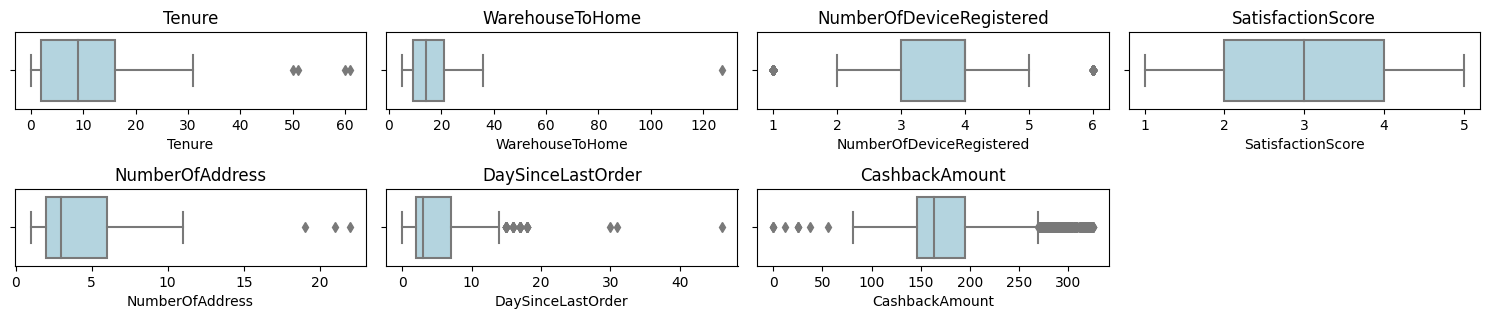

In [14]:
# Melihat outliers bedasarkan kolom numerik
num_features = list(df.describe().columns)
num_features.remove('Churn') #Kolom numerik namun cuma ada unique 0 dan 1
num_features.remove('Complain') #Kolom numerik namun cuma ada unique 0 dan 1

print(num_features)

plotnumber = 1

plt.figure(figsize=(15,6))

for kolom in num_features:
    plt.subplot(4,4, plotnumber)
    sns.boxplot(data=df, x=kolom,color='lightblue')
    plt.title(kolom)
    plt.tight_layout()
    plotnumber = plotnumber + 1

### Penjelasan masing-masing outliers
- Tenure, berapa lama pelanggan ada di platform itu. Tidak diketahui tipe periodenya, bisa jadi hari, minggu atau bulan. Namun apapun periodenya, kita bisa mewajari memang adanya pelanggan yang sudah lama disitu dibandingkan pelanggan lainnya.
- Warehousetohome, bisa dalam satuan kilometer, Ada satu pelanggan yang jaraknya 120 km dari gudang penjualan itu. Namun kita bisa mewajarinya.
- Numberofdevice, kita bisa mewajari jika pelanggan memesan dari tipe device yang berbeda-beda, maka dari itu outlier ini diwajarkan.
- Number of address, Ada beberapa pelanggan yang memiliki lebih dari 15 alamat. Hal ini wajar jika pelanggan memesan di tempat yang berbeda-beda ataupun pelanggan memesan untuk orang lain.
- DaySinceLastOrder, kita asumsikan tipenya harian dan sangat wajar jika memang ada pelanggan yang terakhir kali memesan di waktu yang sudah berlalu lama.
- CashbackAmount, tipe cashback berbeda-beda secara umumnya karena itu berdasarkan dari produk dan harga yang mereka beli, jadi wajar jika ada outliers.

Outliers, kita biarkan karena memang memiliki informasi-informasi dan alasan yang sewajarnya.

Jika diatas kita lihat dari gambar, untuk lebih detil lagi, kita coba lihat dari statistik secara umumnya dibawah ini, kita ambil salah satu sampel dimana outliers yang banyak terjadi, di kolom CashbackAmount.

In [15]:
#Cashback Amount
from scipy.stats import shapiro
_, pval = shapiro(df['CashbackAmount'])
if pval > 0.05:
    print(' is Normal distribution')
else:
    print(' is Not Normal Distribution')

 is Not Normal Distribution


Dilihat dari salah satu distribusi yang tidak normal atau adanya sejumlah outliers, maka:

- Untuk mengisi missing value akan memakai median
- Untuk melakukan scaling kedepannya akan memakai robust scaler

---
# 2. EDA
---

Untuk melihat analisis data secara umum, mari kita lakukan Exploratory data analisis dan visualisasinya. 

- Pertama, kita lihat korelasi antar kolom numeriknya terhadap churn rate itu sendiri

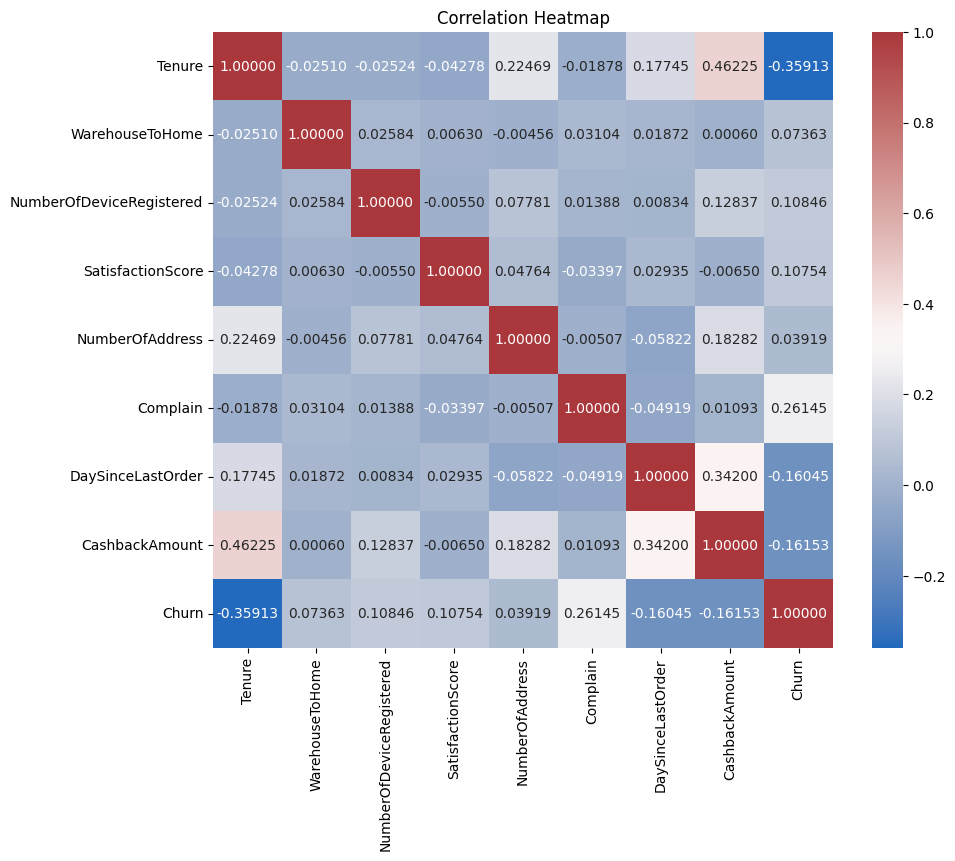

In [16]:
#Korelasi keseluruhan
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='vlag', fmt=".5f")
plt.title('Correlation Heatmap')
plt.show()

Di lihat dari korelasi diatas, jumlah korelasi masing-masing kolom ke churn rate itu terhitung kecil, tiga terbesar kolom adalah complain, numberofdeviceregistered dan satisfaction score. Namun dilihat dari atas, kita masih belum dapat mengetahui penyebab churn secara optimal. Secara asumsi umumnya, mengapa numberofregistered memiliki korelasi tertinggi kedua di situ, karena biasanya jika kita memiliki 6 device terus salah satu device kita tidak pergunakan lagi dan keluar selamanya dari platform, maka itupun bisa terhitung juga menjadi churn tapi kembali lagi itu dihitung dari kriteria churn perusahaan itu sendiri. Untuk konteks EDA ini, agar tidak terjadi ambiguitas maka numberofdeviceregistered kita hiraukan. Maka dari itu, untuk EDA selanjutnya akan memakai dua kolom yaitu complaints dan satisfaction score untuk menghubungkan dengan churn.

a. kita akan melihat porsi Complainnya

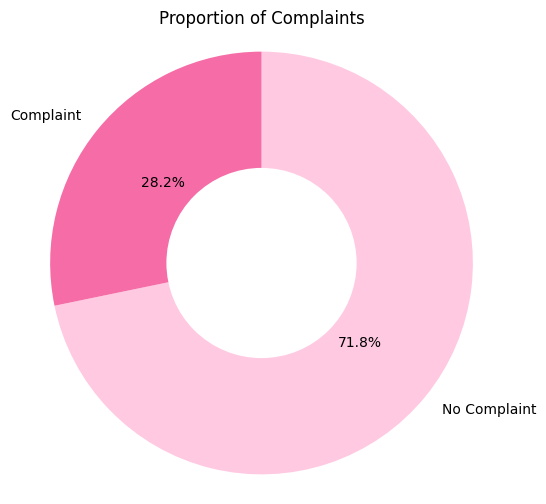

In [17]:
#Porsi komplain
complaint = df['Complain'].value_counts()
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(complaint, labels=['No Complaint', 'Complaint'], autopct='%1.1f%%', startangle=90,colors=['#ffc9e1','#f56ca7'],counterclock=False,textprops={'color':'black'})
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Proportion of Complaints')
plt.show()

Ada sekitar 28.2% yang melakukan complain, tapi apakah ini mempengaruhi churn rate? jika dilihat dari korelasi sebelumnya complain hanye memiliki korelasi 26% terhadap churn.

b. Kita akan melihat Satisfaction Scorenya

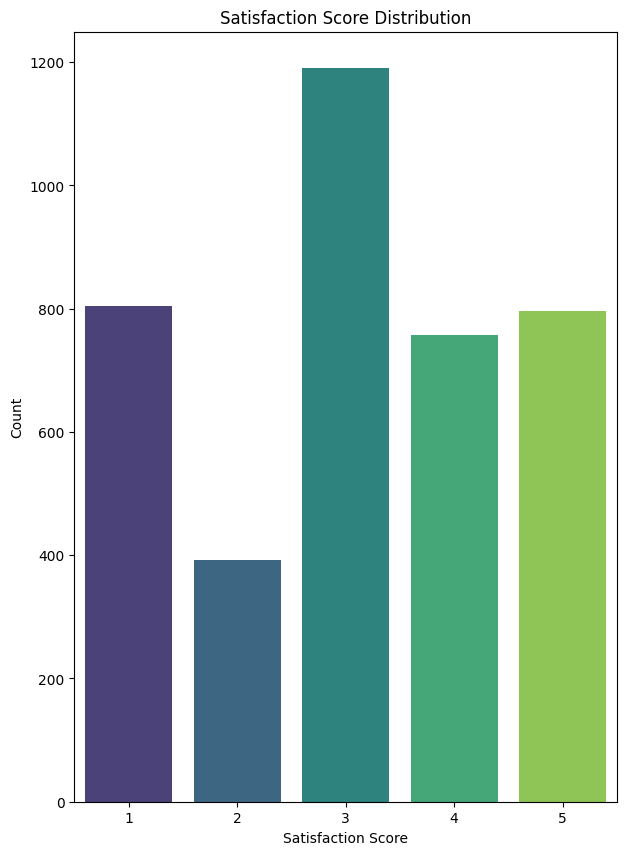

In [18]:
# Porsi rating atau review satisfaction score
plt.figure(figsize=(7,10))
sns.countplot(data=df, x='SatisfactionScore', palette='viridis')
plt.title('Top 10 most airbnb hosted by neighbourhood')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.title('Satisfaction Score Distribution')
plt.xticks(rotation=0);

Terlihat, paling banyak pelanggan yang memberi rating 3, Namun porsi dari pelanggan yang sangat tidak puas(1) dan sangat puas (5) itu jumlahnya hampir setara. Disini bisa dikatakan bahwa pelanggan bisa dikatakan banyak yang tidak puas dengan layanan e-commerce ini. 

Tapi apakah kedua hal (satisfaction dan complain) itu mempengaruhi churn atau tidaknya. Kita lihat dengan korelasi dengan beberapa modifikasi kolom.

c. Kita akan melihat apakah customer dengan complain (atau nilai 1) dan satisfaction score dibawah 4 memiliki korelasi lebih tinggi terhadap churn daripada sebelumnya.

In [19]:
#Data dimana pelanggan memberi rating 1,2,3
filtered_df_below4star = df[df['SatisfactionScore'].isin([1,2,3])]

#Di filter dengan yang memiliki complain
filtered_df_below4star_with_complaint = filtered_df_below4star[filtered_df_below4star['Complain'] == 1]
correlation_satisfaction_123 = filtered_df_below4star_with_complaint['SatisfactionScore'].corr(filtered_df_below4star_with_complaint['Churn'])
correlation_satisfaction_123

0.15194626070057268

Terlihat bahwa korelasi tidak begitu tinggi terhadap churn itu sendiri yang mana nilai korelasinya sekitar 15% saja. Bisa disimpulkan EDA bisa menambah wawasan terhadap data kita, namun untuk mencari solusi yang lebih dalam maka dibutuhkan permodelan di machine learning.

### Untuk itu memang diperlukan machine learning model untuk mengidentifikasi lebih lanjut dalam penelitian ini

---
# 3. Data Preprocessing
---

Data preprocessing dalam machine learning adalah serangkaian langkah yang dilakukan untuk data cleaning, transformasi data, memisahkan fitur dan target/label dan mengorganisasi raw data sehingga menjadi lebih sesuai untuk digunakan dalam pembuatan model machine learning. Tujuan dari data preprocessing adalah untuk meningkatkan kualitas data, mengurangi noise, mengatasi masalah missing values, dan membuat data lebih mudah diinterpretasikan oleh algoritma machine learning.

- Kita tentukan target yang kita cari yang mana adalah kolom Churn

In [20]:
# Feature dan Target
X = df.drop(columns=['Churn'])
y = df['Churn']

- Kita menjabarkan X dan y yang menjadi train dan test, disini saya memporsikan train 75% dan test 25%. Secara umum pemilihan berkisar diantara 20% sampai 30% untuk test sizenya. Pemilihan 25% dikarenakan saya ingin model dapat mempelajari banyak unseen data dalam tesnya namun juga memperhatikan keutuhan informasi dari data trainnya. Sedangkan angka random state itu 42 dimana angka tersebut adalah pilihan secara global, dan penambahan stratisfy=y karena dataset ini bentuknya klasifikasi.

In [21]:
# Memisahkan data tes dan data pelatihan
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [22]:
# Kita melihat lagi kolom apa yang memiliki missing value
X_train.isna().sum()

Tenure                      151
WarehouseToHome             129
NumberOfDeviceRegistered    0  
PreferedOrderCat            0  
SatisfactionScore           0  
MaritalStatus               0  
NumberOfAddress             0  
Complain                    0  
DaySinceLastOrder           157
CashbackAmount              0  
dtype: int64

Disini kita akan melakukan transformer yang mana akan berguna untuk menyesuaikan data-data kita seperti penyesuaian skala numerik, pengisian kolom kosong dan juga pengubahan tipe berbeda seperti huruf ke numerik. Transformer juga berguna untuk menjaga konsistensi data kedepannya. Aspek-aspek dari pengerjaan transformer bisa dibilang pipeline. Dibawah ini adalah penggunaan aspek dari transformer dan alasan penggunaanya.
- Transformer dilakukan untuk konsistensi dan efektifitas pengisian data kedepannya.
- Simple imputer untuk mengisi missing value. Kita kembali lihat di data cleaning sebelumnya bahwasannya korelasi antar 3 kolom yang kosong ini sangat rendah, maka kita bisa melakukan simple imputer dibandingkan imperative. Penggunaan median karena ditemukan outliers di ketiga kolom ini.
- Robust Scaler dilakukan karena adanya kolom-kolom yang distribusi tidak normal dan juga skala angka yang berbeda-beda di antar kolom.
- One hot encoding untuk mengubah kategori menjadi numerik, karena jumlah unique yang tidak terlalu banyak di kolom marital status dan preferred order cat, maka untuk ini bisa pakai one-hot encoding dibandingkan binary encoding.
- Penggunaan simple imputer dan robust scaler bisa digabungkan dalam satu pipeline karena transformer akan mengerti jika ada kolom missing value maka dia akan isi, jika ada kolom yang tidak ada missing value maka dia akan biarkan. Dan kita juga bisa langsung menambahkan scaler dalam pipeline tersebut setelah mereka melakukan imputer.

In [23]:
# Melakukan imputer untuk kolom missing value, dan juga robust scaler karena adanya outliers/data distribusi tidak normal
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# 2 kolom kategorikal di dataset harus diubah menjadi numerik
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# Melakukan transformasi
transformer = ColumnTransformer([
    ('numeric', numeric_transformer, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']),
    ('categorical', categorical_transformer, ['PreferedOrderCat', 'MaritalStatus']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

Kolom transformer sudah dilakukan, namun untuk mengetahui apakah kolom transformer itu bekerja, maka kita bisa mengecek dengan 2 cara, yaitu mencoba transformer fit dimana kita coba data kita dimasukkan ke dalam transformer dan melihat apakah sudah terjalankan dan cara kedua adalah dengan melihat masing-masing value yang kosong apakah sudah terisi atau belum

== Pengecekan Pertama ==

In [24]:
# fit data train fitur ke kolom transformasi
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

Transformer sudah berjalan tanpa adanya error, mengindikasikan transformer itu sudah berjalan

== Pengecekan kedua ==

In [25]:
# Kita buat x_train buat mengecek
X_train_checking = transformer.transform(X_train)

#jadikan dataframe
X_train_checking_df = pd.DataFrame(X_train_checking)
col_names = [col.split('__')[1] for col in transformer.get_feature_names_out()]
X_train_checking_df.columns = col_names

In [26]:
# cek 3 kolom kosong sebelumnya.
X_train_checking_df[['Tenure','WarehouseToHome','DaySinceLastOrder']].isna().sum()

Tenure               0
WarehouseToHome      0
DaySinceLastOrder    0
dtype: int64

In [27]:
# cek robust scaler dan onehot encoding
X_train_checking_df.head(3)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,0.750000,1.3,0.0,0.5,0.0,0.0,0.2,-0.072961,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.666667,0.7,0.0,-1.0,1.0,1.0,0.4,-0.276920,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.000000,-0.2,0.0,0.0,0.0,0.0,-0.2,-0.421184,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Pengecekan missing value, sudah tidak ada lagi missing value dan nilai kategorikal kolom sudah digantikan oleh numerik dan juga sudah disesuaikan masing-masing kolom yang ada dengan penyesuaian skalanya.

Perlu diperhatikan, bahwa nama X_train_checking_df ini hanya untuk melakukan pengecekan bahwasannya transformer kita sudah bekerja dengan baik. Namun kedepannya karena kita akan mencari model yang paling optimal kita akan kembali menggunakan X_train lagi. Hal ini didasari karena kita akan menggabungkan kolom transformer dengan rumus codingan pengulangan kedepannya. Daripada kita tidak melakukan pengulangan, maka kita harus berkali-kali mencoba menggunakan satu blok kode ke blok kode lainnya dimana akan terlihat kurang efektif dan tidak begitu efisien.

===

---
# 4. Model Benchmarking
---

Di tahap ini kita akan melakukan model benchmarking, model yang akan kita pakai adalah model klasifikasi yang antara lain
- logistic regression, prediksi berdasarkan hubungan linier antara fitur-fitur input dan probabilitas kejadian suatu kelas.
- Decision Tree, pemilihan fitur yang paling penting pada setiap langkahnya untuk memprediksi keputusan.
- Random forest, algoritma ensemble yang terdiri dari sejumlah decision tree(keputusan-keputusan) yang dihasilkan secara acak untuk mengurangi overfit(terlalu kompleks)
- KNN, mengidentifikasi kelas mayoritas dari tetangga (jarak data terdekat) dari titik yang akan diprediksi.
- XG Boost. algoritma ensemble yang populer dengan menggabungkan sejumlah besar pohon keputusan yang telah disempurnakan sebelumnya.
- Stacking itu menggunakan model-model yang berbeda untuk saling melengkapi. Ada namanya final estimator disini yang bebas dipilih namun bisa dilihat dari beberapa pertimbangan seperti kompleksitas data dan distribusi data.
- voting, teknik yang berdasarkan 'pemilihan' dari model model sebelumnya yang telah diinterpretasikan, tebgagi 2, hard dan soft,
    - voting hard, setelah model-model lainnya diinterpretasi maka kelas yang paling banyak dipilih oleh model-model tersebut akan menjadi suara mayoritas yang akan dipakai disini.
    - voting soft, setelah model-model lainnya diinterpretasi maka kelas akan dibobotkan beradasarkan probabilitas model-model sebelumnya dan bobot serta probabilitas akan terpilih dan juga akan dipakai disini.

Namun dibawah ini kita akan menggabungkan juga, metode-metode sampling (karena data kita imbalance), antara lain
- Random Oversampler (ROS), teknik di mana sejumlah acak dari sampel-sampel mayoritas ditambahkan ke dataset minoritas sehingga kedua kelas memiliki data seimbang, atau dengan kata lain menambah data yang tidak seimbang menjadi lebih banyak. Ada 2 lagi teknik didalam ROS ini,
    - SMOTE adalah teknik yang menciptakan sampel-sampel sintetis dari kelas minoritas dengan cara menggabungkan atribut-atribut dari sampel-sampel minoritas yang sudah ada. Ini membantu meningkatkan jumlah sampel minoritas tanpa hanya menyalin data yang sudah ada.
    - SMOTEENN adalah teknik  untuk menciptakan sampel-sampel sintetis dari kelas minoritas, kemudian menghapus sampel-sampel yang salah klasifikasi dari kedua kelas.

- Random Undersampler(RUS), teknik di mana sejumlah acak dari sampel mayoritas dihapus dari dataset sehingga kelas minoritas dan mayoritas memiliki jumlah yang lebih seimbang. Atau dengan kata lain menghapus data di kelas minoritas. Ada teknik lain dalam RUS ini,
    - NEARmiss, teknik dengan menghapus sejumlah sampel mayoritas yang berdekatan dengan sampel-sampel minoritas. Untuk mendapatkan data seimbang namun relevan.

In [28]:

# Karena kita akan memakai metric F2,
f2_score = make_scorer(fbeta_score, beta=2)

# Define 5 model-modelnya atau bisa dikatakan 5 model utama
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state = 42)

# Define model voting berdasarkan 5 model sebelumnya
votingHard = VotingClassifier(estimators=[
                                ('logreg', logreg), ('knn', knn), ('dt', tree), ('random forest', rf), ('xgb', xgb)
                                ], voting='hard')

votingSoft = VotingClassifier(estimators=[
                                ('logreg', logreg), ('knn', knn), ('dt', tree), ('random forest', rf), ('xgb', xgb)
                                ], voting='soft')

#Define model stacking berdasarkan 5 model sebelumnya
estimators = [
    ('tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('logreg', LogisticRegression(random_state=42)),
    ('random forest', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
]

# untuk stacking dibutuhkan final_estimator, ini untuk menggabungkan prediksi dari model-model untuk membuat prediksi akhir, caranya dengan menaruh satu tipe model ensemble.
# Pemilihan final estimator bisa pakai logreg, random forest atau xgboost, tergantung datanya.  
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(random_state=42) # logreg = data tidak terlalu kompleks (rows tidak begitu banyak) dan distribusi tidak normal.
)

#Sampling karena dataset ini imbalance
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()
smoteen = SMOTEENN(random_state=42)

# penamaan dan penggunaan model untuk output nantinya
models = {'KNN': knn, 
          'Logistic Regression':logreg, 
          'Decision Tree': tree,
          'xgb': xgb,  
          'random forest':rf,
          'votingHard':votingHard,
          'votingSoft':votingSoft,
          'stacking':clf
          }

#penamaan dan penggunaan sampling untuk output nantinya
resample = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near': near,
    'smoteenn': smoteen
}

# penamaan dan penggunaan kolom metrik untuk output nantinya
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'f2': f2_score}

#varianel untuk store hasil (list) pengulangan dibawahnya.  
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
test_f2_arr = []
list_algo = []
list_resample = []

#pengulangan untuk model dan sampel 
for name_resample,resample in resample.items():
    for name_algo,model in models.items():
        crossval = StratifiedKFold(n_splits=5) #validasi dengan iterasi dipisah 5 kali, stratisfieldKfold karena data klasifikasi
        
        #Menggunakan pipeline/transformer yang telah kita define di model pre-processing
        if resample == None:
            estimator = Pipeline([
                ('transorm', transformer),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('transorm', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_algo.append(name_algo)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics) #tetap memakai X_train bukan X_train_checking_df karena transformer kita taruh di codeblock ini.
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean()) #mean bukan median yang dipakai disini karena tujuan untuk mencari evaluasi model semata, maka mean lah yang dipakai secara umumnya.
        test_precision_arr.append(scores['test_precision'].mean())
        test_recall_arr.append(scores['test_recall'].mean())
        test_f1_arr.append(scores['test_f1'].mean())
        test_f2_arr.append(scores['test_f2'].mean())

#benchmarking model dalam bentuk tabel
model_bench = pd.DataFrame({
    'model': list_algo,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr,
    'f2': test_f2_arr
})

model_bench

,model,resample,accuracy,precision,recall,f1,f2
0,KNN,none,0.680469,0.696948,0.396040,0.504106,0.433075
1,Logistic Regression,none,0.723829,0.736931,0.483168,0.581742,0.518053
2,Decision Tree,none,0.851423,0.732460,0.760396,0.745862,0.754438
3,xgb,none,0.861770,0.795211,0.764356,0.779018,0.770046
4,random forest,none,0.839792,0.842997,0.706931,0.768212,0.730087
5,votingHard,none,0.831871,0.839646,0.691089,0.757528,0.716104
6,votingSoft,none,0.850826,0.830427,0.732673,0.777734,0.749912
7,stacking,none,0.859911,0.826886,0.752475,0.787437,0.765981
8,KNN,ros,0.808293,0.499690,0.778218,0.608237,0.699804
9,Logistic Regression,ros,0.803431,0.446350,0.815842,0.576593,0.699479


- Mari kita sortir 

In [29]:
#Top 10 model disortir
model_bench_sort = model_bench.sort_values(by='f2',ascending=False)
model_bench_sort.head(10)

,model,resample,accuracy,precision,recall,f1,f2
11,xgb,ros,0.885033,0.780672,0.817822,0.798426,0.809854
13,votingHard,ros,0.884421,0.775570,0.817822,0.795816,0.808794
14,votingSoft,ros,0.883227,0.773284,0.815842,0.793820,0.806844
20,random forest,rus,0.879075,0.587967,0.887129,0.706517,0.804551
23,stacking,rus,0.878553,0.594526,0.881188,0.709911,0.803590
29,votingHard,smote,0.877022,0.756130,0.807921,0.780687,0.796680
22,votingSoft,rus,0.870594,0.565176,0.881188,0.688466,0.792369
30,votingSoft,smote,0.871663,0.750760,0.798020,0.772906,0.787593
19,xgb,rus,0.867155,0.557160,0.879208,0.681499,0.787526
27,xgb,smote,0.871406,0.782405,0.788119,0.785116,0.786881


Terlihat dari model benchmarking diatas, dan kita akan mensortirnya dengan F2 metrik, maka model XGboost dengan sampling random over sampler memiliki angka tertinggi. Mari kita definisikan secara lebih dalam cara kerja XGBoost.

### - Cara kerja model xgboost

XGBoost ini bekerja dengan cara menggabungkan banyak model (decision tree) kedalam modelnya, caranya,
- Xgboost memulai dengan decision tree yang sederhana terlebih dahulu, atau dengan kata lain melatih data pelatihan ke kelompok yang kecil dahulu.
- Kemudian Xgboost memilih fitur terbaik dari sana dan membangun sebuah 'pohon'. Perlu diperhatikan bahwa pohon awal ini belum menggambarkan pola yang cukup baik.
- Maka dari itu Xgboost membangun pohon kedua dengan memperhatikan kesalahan pola-pola sebelumnya di pohon pertama dengan cara memberikan bobot yang lebih ke data-data yang salah diklasifikasikan di pohon pertama.
- Begitu juga dengan pohon-pohon berikutnya sampai jumlah iterasi tertentu. 
- Dalam setiap iterasi, xgboost memantau penilaian yang signifikan dari pohon ke pohon hingga peningkatan nilai sudah terlihat lagi, disitulah Xgboost akabn berhenti iterasi. Dan disini juga xgboost mengintegrasu prediksi akhir dengan menjumlahkan prediksi semua pohon yang ada di iterasi tersebut.

Kegunaan dan cara bekerja RandomOverSampling disini,
- Berfungsi untuk menyeimbangkan kasus data yang tidak seimbang, ketidakseimbangan ini biasa disebut data mayoritas dan data minoritas.
- Cara bekerja ROS ini adalah dengan menduplikat data di minoritas sehingga jumlahnya sama seperti data mayoritas. 
- Kelebihannya adalah informasi data di mayoritas tidak akan hilang namun bisa menimbulkan banyak duplikasi informasi di data minoritas karena data minoritas inipun di duplikat berkali-kali.
- Hubungan Xgboost dan ROS adalah untuk menyeimbangkan data dahulu sebelum diprediksi oleh model Xgboost, hal ini bertujuan untuk mengurangi XGboost dalam memprediksi kelas mayoritas yang terlalu sering jika terjadi ketidak-seimbangan data. Dengan ROS ini, Xgboost bisa mendapat informasi lebih banyak untuk data minoritas sehingga model bisa meningkatkan performanya dalam mengenali kasus-kasus positif yang ada.

---
# 4. Predict to test
---

Jika diatas kita melakukan modeling dengan data training ini, maka dibawah ini kita akan melakukannya untuk data testnya. Predict to test adalah penggunaan model yang sudah kita latih dan pilih terhadap data tesnya untuk tujuan diuji prediksinya.

Kita telah memilih Xgboost dan RandomOverSampling berdasarkan f2-score metrik kita, sebelumnya, mari kita bandingkan 3 model yang ada dalam top 10 kita. 

Akan tetapi karena salah satu metode esensial yang akan kita lakukan setelah pemilihan model Machine learning (xgboost disini) adalah hyperparameter Tuning maka beberapa model yang tidak bisa di hyper-parameter tuning kedepannya akan kita hiraukan, seperti voting dan stacking. 

Mengapa voting dan stacking tidak bisa di tuning? Karena dua model ini sudah memiliki bawaan arsitektur tuning di dalam modelnya, kita lihat sebelumnya di 'estimator' voting dan stacking ada beberapa model enseble seperti knn,logreg,xgboost,dst. Sehingga jika kita tuning lagi maka kompleksitas akan semakin tinggi, hal ini bisa berakibat heterogensi yang mana akan berakibat variansi dan bias yang tinggi, kembali menimbulkan overfitting dan performa yang tidak konsisten.

Dan mengapa saya menyantumkan voting dan stacking di tahap ketiga atau model benchmarking? Karena jika yang terpilih f2 terbaik adalah voting dan stacking, maka model yang kita akan pakai adalah model itu dan kita tidak akan melakukan tuningnya, padahal hyperparameter itu diperlukan untuk melihat model dan prediksi kita bisa lebih optimal atau tidak. Namun kenyataanya, F2 tertinggi adalah Xgboost, jadi untuk 3 model yang akan kita bandingkan dalam adalah, 

In [30]:
#pemilihan 3 top model 
top3_models = model_bench_sort.head(10)
top_models = top3_models.drop(top3_models[top3_models['model'].isin(['votingSoft', 'votingHard', 'stacking'])].index)
top_models.head(3)

,model,resample,accuracy,precision,recall,f1,f2
11,xgb,ros,0.885033,0.780672,0.817822,0.798426,0.809854
20,random forest,rus,0.879075,0.587967,0.887129,0.706517,0.804551
19,xgb,rus,0.867155,0.557160,0.879208,0.681499,0.787526


Masih memakai train data untuk tabel diatas, tiga teratas model adalah xgb RandomOverSampler, random forest RandomUnderSampler dan Xgboost Random UnderSampler.
- Disini saya ingin melihat dan membuktikan kembali apakah xgboost ROS adalah model yang paling optimal untuk dipilih setelah kita masukan data test nya.
- Disini juga terlihat f2 score yang berdekatan antara ketiga hal tersebut berdasarkan data train.

Mari kita uji coba dengan data tes terlebih dahulu

In [31]:
#Definisikan 3 model untuk test
xgb_ros = xgb
rf_rus = rf 
xgb_rus = xgb

#variabel untuk menyimpan metrik
score_accuracy = []
score_precision = []
score_recall = []
score_f1 = []
score_f2 = []

#permodelan untuk 3 model tersebut
models = [
    ('xgb ROS', xgb_ros, RandomOverSampler(random_state=42)),
    ('random forest rus', rf_rus, RandomUnderSampler(random_state=42)),
    ('xgb rus', xgb_rus, RandomUnderSampler(random_state=42))
]
#Mentransform dan resample untuk data tesnya
for model_name, model, resampler in models:
    model_pipeline = Pipeline([
        ('transform', transformer),
        ('resampling', resampler),
        ('model', model)
    ])
    model_pipeline.fit(X_train, y_train) #fit kembali trainnya untuk bisa melakukan prediksi
    
    y_pred = model_pipeline.predict(X_test) #prediksi test
    
    accuracy = accuracy_score(y_test, y_pred) #penggabungan test dengan metrik-metrik
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    
    score_accuracy.append(accuracy) #menyimpan ke list variabel di line 6 sebelumnya
    score_precision.append(precision)
    score_recall.append(recall)
    score_f1.append(f1)
    score_f2.append(f2)

score_df = pd.DataFrame({ #menjadikan sebuah tabel
    'Accuracy': score_accuracy,
    'Precision': score_precision,
    'Recall': score_recall,
    'F1 Score': score_f1,
    'F2 Score': score_f2
}, index=[f'{model_name} test before tuning' for model_name, _, _ in models])

score_df


,Accuracy,Precision,Recall,F1 Score,F2 Score
xgb ROS test before tuning,0.934077,0.813253,0.798817,0.805970,0.801663
random forest rus test before tuning,0.854970,0.547445,0.887574,0.677201,0.789474
xgb rus test before tuning,0.861055,0.559259,0.893491,0.687927,0.798097


- Disini saya menambahkan before tuning untuk mempresentasikannya lebih jelas.
- XGB model di train data sebelumnya adalah 0.809 dan disini 0.801, perbedaan yang sangat sedikit menandakan model train sudah bisa optimal dan stabil dalam pengerjaan data test.
- Terlihat model Xgboost Random Over Sampler masih memiliki f2 yang tertinggi
- Namun angka f2 score datates ini dari ketiga model tersebut masih berdekatan, kita kedepannya hanya akan memilih satu model saja, sejauh ini jika dilihat dari angka f2, kita memakai Xgboost, tapi untuk melihat lebih jelas lagi, mari kita visualisasikan dengan confusionn matrix
- Confusion matrix berguna untuk melihat angka secara ril dalam kasus positif atau negatif dan kita bisa membandingkanya, 

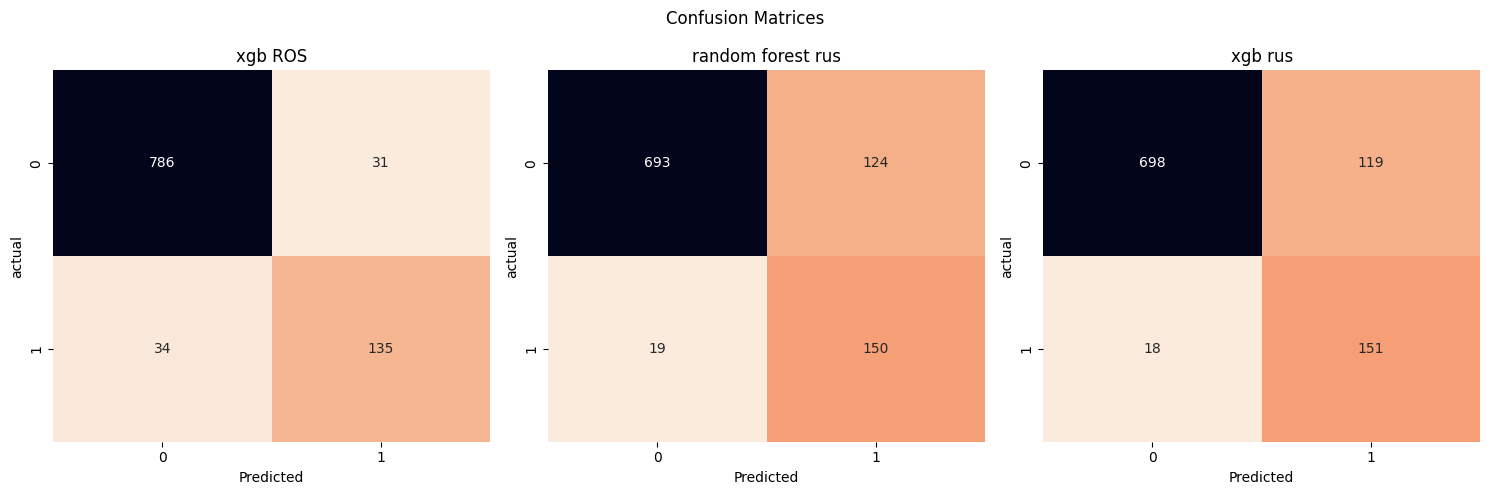

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3 model diatas kita masukan dalam proses pembuatan visualisasi confusion matrix
confusion_matrices = []

for model_name, model, resampler in models:
    model_pipeline = Pipeline([
        ('transform', transformer),
        ('resampling', resampler),
        ('model', model)
    ])
    
  
    model_pipeline.fit(X_train, y_train)
    
    y_pred = model_pipeline.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    confusion_matrices.append((model_name, cm))

# visualisasi
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
fig.suptitle("Confusion Matrices")

for i, (model_name, cm) in enumerate(confusion_matrices):
    ax = axes[i]
    ax.set_title(model_name)
    sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r", ax=ax, cbar=False)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("actual")

plt.tight_layout()
plt.show()


- Ketiga confusion matrix ini hanya berfungsi untuk visualisasi 3 model dan membuktikan bahwa xgboost ROS adalah model optimal, 
- Untuk pembobotan FN dan FP disini kita kesampingkan dahulu, karena tujuannya kembali lagi ke pemilihan model paling optimal saja disini.
- Bisa kita hitung dengan jumlah FN dan FP
    - XGB ROS = 75
    - Random forest rus = 143
    - XGB rus = 137

Terlihat model yang paling optimal dan memprediksi lebih tepat dalam penentuan FN dan FP nya adalah yang jumlah salah prediksinya yang paling sedikit, yaitu XGB ROS (sesuai dengan pemilihan model bench-marking dan perbandingan 3 model untuk test sebelumya)

---
# 5. Hyperparameter Tuning
---

Tahapan hyperparameter tuning dilakukan untuk mengatur parameter yang tidak dapat dipelajari di proses data pelatihan sebelumnya, tujuannya untuk mencari nilai optimal dari kombinasi-kombinasi yang ada sehingga model bisa mendapatkan kinerja yang lebih baik dalam proses memprediksi data yang belum terlihat sebelumnya(unseen data), pemilihan model adalah xgboost memakai randomoversampler yang dibahas sebelumnya.

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

# Hyperparameter space untuk XGBoost, angka-angka default dari dokumentasi sudah dimasukan dan angka-angka lainnya sudah disesuaikan dibawah
xgb_hyperparam_space = {
    'model__n_estimators': [50, 100, 500],              # Jumlah iterasi yang akan dilakukan algoritma
    'model__learning_rate': [0.01, 0.1, 0.2, 0.3],           # iterasi belajar dari kesalahan sebelumnya
    'model__max_depth': [3, 6, 9],                     # mengontrol kompleksitas model agar tidak overfit atau underfit
    'model__min_child_weight': [1, 3, 5],              # mengontrol regulerisasi untuk menghindari pembagian yang terlalu kecil
    'model__subsample': [0.9, 1, 1.1],               # melatih tiap nodes didalam sample
    'model__colsample_bytree': [0.9, 1, 1.1],       # mengambil dan melatih sampel setiap nodenya untuk mengurangi korelasi yang tinggi
    'model__gamma': [0, 0.1, 0.2],                     # Regulerisasi agar tidak overfit
    'model__scale_pos_weight': [1, 2, 3],              # Mengatur ketidakseimbangan
}
f2_scorer = make_scorer(fbeta_score, beta=2) #metrik

#transform, model dan sampling
xgb_tune = XGBClassifier(random_state=42)
ros_tune = RandomOverSampler(random_state=42)

pipe_model = Pipeline([
    ('prep', transformer),
    ('resampling', ros_tune),
    ('model', xgb_tune)                  
])

# Grid Search, menguji keseluruhan kombinasi dengan pendekatan yang lebih sistematis.
gridsearch = GridSearchCV(
    estimator=pipe_model,          #berdasarkan pipe model yang kita definiskan sebelumnya
    param_grid=xgb_hyperparam_space,  #kombinasi hyperparameter untuk xgb
    cv=5,                           # validasi sebanyak 5 kali/kfold
    scoring = f2_scorer, #metrik
    n_jobs = -1  #pemakaian cpu/core untuk menjalankan model ini             
)

In [34]:
# fitting 
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'Complain',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount'])...
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.9, 1, 1.1],
                         'model__gamma': [0, 0.1, 0.2],
                         'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'model__max_depth': [3, 6, 9],
                         'model__min_child_weight': [1, 3, 5],
                         'model__n_estimators': [50, 100, 500],
                         'model__scale_pos_weight': [1, 2, 3],
                         'model__subsample': [0.9, 1, 1.1]},
             scoring=make_scorer(fbeta_score, beta=2))

In [35]:
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.8518095951766611
{'model__colsample_bytree': 1, 'model__gamma': 0.1, 'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__min_child_weight': 5, 'model__n_estimators': 50, 'model__scale_pos_weight': 3, 'model__subsample': 1}


Transformer diatas sama halnya seperti transformer sebelumnya di data training, dan dibawah ini adalah untuk mencari angka metric XGboost data tes yang telah di tuning.

In [36]:
#tuning model xgboost
xgb_tuning = gridsearch.best_estimator_
xgb_tuning.fit(X_train, y_train)
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

#metrik-metrik yang dicari dari xgboost dan data tes
accuracy_xgb_tuning = accuracy_score(y_test, y_pred_xgb_tuning)
precision_xgb_tuning = precision_score(y_test, y_pred_xgb_tuning)
recall_xgb_tuning = recall_score(y_test, y_pred_xgb_tuning)
f1_xgb_tuning = f1_score(y_test, y_pred_xgb_tuning)
f2_xgb_tuning = (fbeta_score(y_test, y_pred_xgb_tuning, beta=2))

#pembuatan tabel
score_after_tuning = pd.DataFrame({'Accuracy': accuracy_xgb_tuning, 
                                   'Precision': precision_xgb_tuning, 
                                   'Recall': recall_xgb_tuning, 
                                   'F1 Score': f1_xgb_tuning,
                                   'F2 Score': f2_xgb_tuning}, index=['XGB ROS test after Tuning'])
score_after_tuning

,Accuracy,Precision,Recall,F1 Score,F2 Score
XGB ROS test after Tuning,0.900609,0.666667,0.840237,0.743455,0.79865


Mari kita bandingkan dengan hasil sebelum tuning

In [37]:
#perbandingan sebelum dan setelah tuning
xgb_before = 'xgb ROS test before tuning'
score_before_tuning = score_df[score_df.index == xgb_before]
compare_scores = score_before_tuning.append(score_after_tuning)
compare_scores.index = ['xgb ROS test before tuning', 'XGB ROS test after tuning']
compare_scores

,Accuracy,Precision,Recall,F1 Score,F2 Score
xgb ROS test before tuning,0.934077,0.813253,0.798817,0.805970,0.801663
XGB ROS test after tuning,0.900609,0.666667,0.840237,0.743455,0.798650


Disini terlihat bahwa model XG boost setelah dilakukan hyperparameter, maka F2_score nya menurun 0.03%, ini menandakan penurunan setelah dilakukan hyperparameter.

Sekarang kita interpretasikan 2 perbandingan tersebut dalam visualisasi confusion matrix.

Text(0.5, 1.0, 'XGB ROS after tuning')

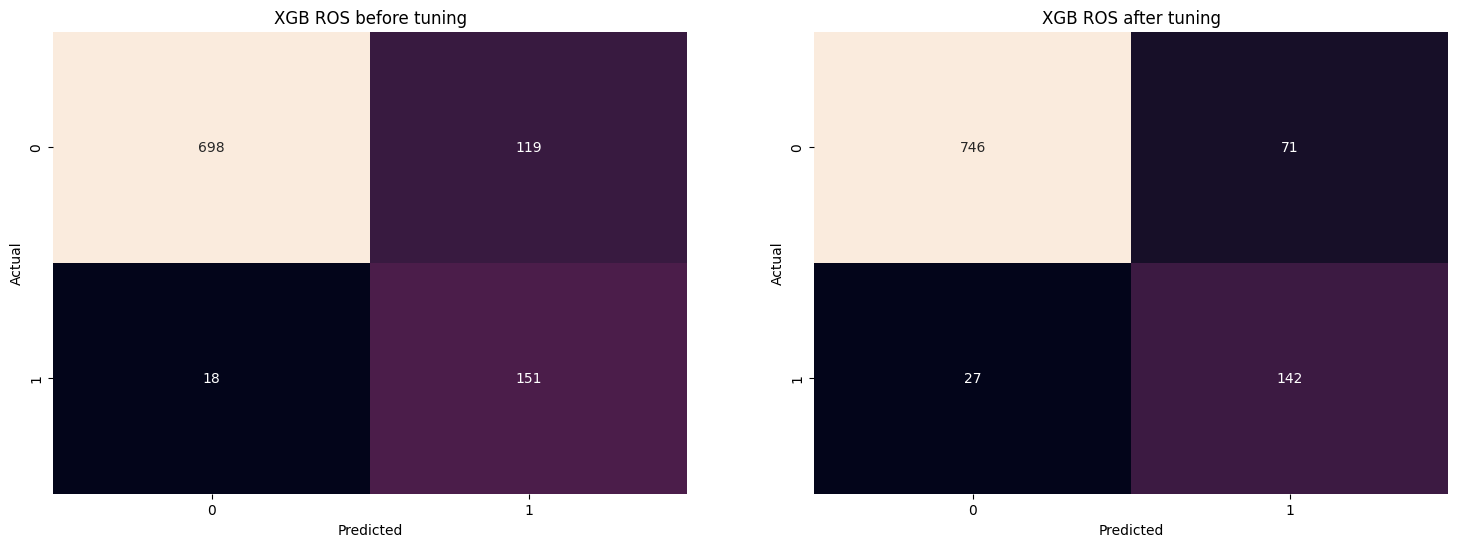

In [38]:
#Confusion Matrix before vs after tuning

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt='.0f', ax=axes[0], cbar=False)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('XGB ROS before tuning')

cm2 = confusion_matrix(y_test, y_pred_xgb_tuning, labels=xgb_tuning.classes_)
sns.heatmap(cm2, annot=True, fmt='.0f', ax=axes[1], cbar=False)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('XGB ROS after tuning')



Dari visualisasi diatas, terlihat bahwa.
- Xgb sebelum tuning memiliki salah prediksi FN 34 dan FP 31 atau total keduanya 65
- Namun setelah dituning FN menurun menjadi 27 namun FP menjadi lebih besar menjadi 71. 
- Berdasarkan tujuan awal, kita ingin model menurunkan nilai FN karena lebih costly, namun kita juga perlu memperlihat pergerakan FPnya juga. Setelah dituning, FP jadi jauh lebih besar. Kita tidak ingin itupun terjadi.

#### Maka setelah melihat perbandingan f2-score dan confusion matrix, kita akan memilih model XGboost yang sebelum dituning.

---
# 6.Model Interpretation
---

Dalam tahap ini, kita akan melakukan interpretasi modelnya agar bisa memahami model lebih lanjut dan kegunaanya. Disini interpretasi akan dalam bentuk 'feature importance' dan 'lime tabular'.
- Tujuan feature importance untuk mencari fitur-fitur apa saja yang berpengaruh pada churn rate.
- Dimana fitur-fitur yang berpengaruh bisa kita gali lebih dalam untuk memberikan rekomendasi dan solusi dari segi bisnisnya
- Kebetulan data kolom disini tidak begitu banyak maka tidak dibutuhkan seleksi fitur dan kita bisa melihat beberapa fitur yang paling tinggi pengaruhnya terhadap churn itu.
- Sedangkan lime tabular untuk memberikan interpretasi berdasarkan salah satu contoh data dan dijelaskan pengaruhnya terhadap churn baik dari fitur numerik atau kategorikal.

- ### Feature Importance

In [39]:
#kita define model paling optimal kita lagi yaitu xgboost sebelum tuning
best_model = Pipeline([
    ('transform', transformer),
    ('resampling', RandomOverSampler(random_state=42)),
    ('model', xgb)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('categorical',
                                                  Pipelin...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [40]:
#melihat fitur-fitur dalam angka di model
best_model['model'].feature_importances_

array([0.25063813, 0.03191202, 0.03639859, 0.05743026, 0.0498991 ,
       0.14879069, 0.05057197, 0.04570791, 0.03780996, 0.07898403,
       0.03058348, 0.04411113, 0.01548765, 0.07439084, 0.04728427],
      dtype=float32)

In [41]:
#melihat fitur-fitur dalam nama kolom di model
best_model.named_steps['transform'].get_feature_names_out()

array(['numeric__Tenure', 'numeric__WarehouseToHome',
       'numeric__NumberOfDeviceRegistered', 'numeric__SatisfactionScore',
       'numeric__NumberOfAddress', 'numeric__Complain',
       'numeric__DaySinceLastOrder', 'numeric__CashbackAmount',
       'categorical__PreferedOrderCat_Grocery',
       'categorical__PreferedOrderCat_Laptop & Accessory',
       'categorical__PreferedOrderCat_Mobile',
       'categorical__PreferedOrderCat_Mobile Phone',
       'categorical__PreferedOrderCat_Others',
       'categorical__MaritalStatus_Married',
       'categorical__MaritalStatus_Single'], dtype=object)

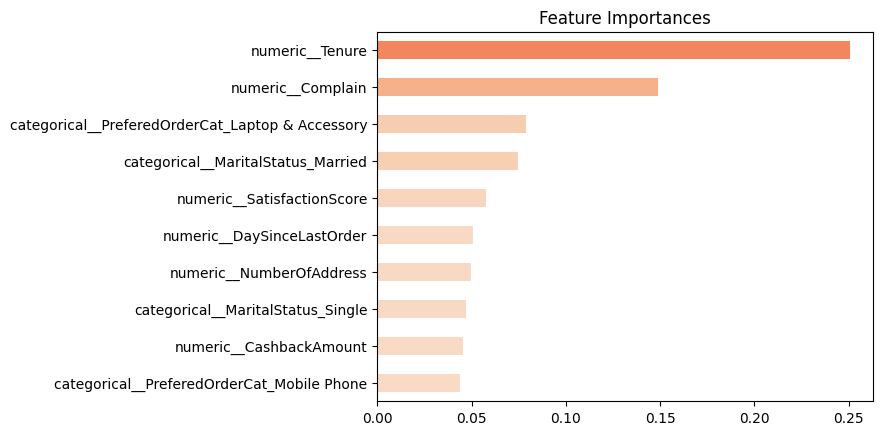

In [44]:
#visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

feature = pd.Series(best_model['model'].feature_importances_, best_model.named_steps['transform'].get_feature_names_out()).sort_values(ascending = False).head(10)
feature = feature.iloc[::-1] #agar ter-urut dari paling besar nilainya
cmap = cm.get_cmap('rocket_r')
feature.plot(kind='barh', title='Feature Importances',color=cmap(feature))
plt.show()

Terlihat dari visualisasi diatas, bahwa Tenure (lama pelanggan di platform) dan Complain (pernah melakukan keluhan) adalah 2 faktor yang paling mempengaruhi terhadap churn rate dari pelanggan e-commerce di data ini. 2 faktor ini adalah sebuah informasi penting yang mana perusahaan diharapkan bisa menanganinya. Dan 2 faktor inilah yang akan menjadi sasaran rekomendasi di akhir.

- ### Lime Tabular Explanation

In [45]:
#library lime
import lime
from lime import lime_tabular

In [46]:
# Menyesuaikan transformasi serta data train set untuk proses lime
X_train_transform = transformer.fit_transform(X_train)
X_train_cols = [i.split('__')[1] for i in transformer.get_feature_names_out()]
X_test_transform = transformer.transform(X_test)

model.fit(X_train_transform, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [47]:
# fungsi dari lime, explainer adalah komponen lime yang akan menjelaskan cara kerja model untuk salah satu individual
explainer = lime_tabular.LimeTabularExplainer(
    training_data= X_train_transform,
    feature_names= X_train_cols,
    class_names= ['not churn', 'churn'],
    mode= 'classification'
)

(Sebelumnya, default tema library lime adalah gelap dan tidak bisa diubah, dan warnanya bisa bertabrakan jika environment kita gelap juga)

Di dalam line tabular ini, kita bisa melihat dan memprediksi kecenderungan salah satu pelanggan untuk melakukan churn atau tidak. Akan terlihat dari probabilitas dari churn atau tidaknya dan juga faktor/fitur yang mempengaruhi keputusan tersebut. Kita ambil 2 contoh, yaitu pelanggan yang prediksi keputusannya churn dan tidak churn

In [48]:
#visualisasi output dari lime tabular
exp = explainer.explain_instance(
    data_row = X_test_transform[101], #index pelanggan
    predict_fn = model.predict_proba
)
exp.show_in_notebook(show_table=True)

Contoh pertama, berdasarkan model, pelanggan index 101 memiliki peluang 84% untuk bertahan di platform ini. Kita bisa melihat bahwa beberapa fitur memang mendukung dia untuk bertahan lebih banyak daripada fitur-fitur yang mempengaruhi dia untuk keluat. Seperti dia tidak pernah ada complain/keluhan dan tenure terhitung yang masih baru.

In [49]:
#visualisasi output dari lime tabular
exp = explainer.explain_instance(
    data_row = X_test_transform[65], #index pelanggan
    predict_fn = model.predict_proba
)
exp.show_in_notebook(show_table=True)

Contoh kedua, berdasarkan model, pelanggan index 65 memiliki peluang 65% untuk keluar/churn di platform ini.Ada faktor-faktor yang bisa membuat dia keluar, yaitu dia telah melakukan komplain, dan satisfaction score di angka 0.06 (dimana range 0 - 0.50 adalah range satisfaction score yang mempengaruhi pelanggan churn)

In [52]:
#import_pickle

resample = RandomOverSampler(random_state=42)
model = XGBClassifier(random_state=42)

estimator = Pipeline([
    ('transorm', transformer),
    ('resample', resample),
    ('model', model),
])
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

In [ ]:
import pickle

model = pickle.dump(estimator, open('model.sav', 'wb'))

---
# Analysis and Conclusion
---

Kita lihat lagi dari dataset awal, dataset ini mengenai data sebuah perusahaan/platform e-commerce yang melihat berapa banyak pelanggan yang churn(cancel atau unsubscribe atau meninggalkan platform) dan yang masih loyal terhadap platform perusahaan ini. jadi 1 adalah churn dan 0 adalah tidak churn.

perumusan masalah disini, 'Penggunaan machine learning untuk mengidentifikasi pola pelanggan yang berpotensi meninggalkan platform mereka, sehingga dapat mengambil tindakan pemasaran yang tepat dan efisien dalam biaya?. 

Tujuannya adalah untuk mencari machine learning model yang paling optimal sehingga perusahaan menghemat cost dalam melakukan usaha retensi pelanggan. Lalu, dari model tersebut diharapkan bisa terlihat faktor-faktor yang membuat pelanggan churn dan perusahaan bisa membangun strategi kedepannya.

Untuk menjawab hal tersebut, telah dilakukan penggunaan machine learning dengan model XGboost random oversampler sebelum tuning . Kita kembali melihat perbandingan matrixnya,

- False Positive = Diprediksi bahwa pelanggan akan meninggalkan platform kita(Churn) padahal aktualnya pelanggan masih setia.
- False Negative = Diprediksi bahwa pelanggan akan tetap di platform kita, tapi kenyataannya mereka meninggalkan (churn) platform kita. 

Disini perusahaan ingin mengetahui sasaran pelanggan yang tepat untuk mereka pertahankan,  False negative dan False positif sudah didiskusikan di awal bahwa kedua-duanya berbahaya jika dibiarkan namun False negatif lebih merugikan jika dilihat dari teori customer centric. Faktor dari sisi customer-centric yang menyatakan bahwa FN lebih berbahaya ketimbang FP adalah,
    - Revenue, salah deteksi kepergian pelanggan, maka pelanggan akan churn begitu saja dimana akan berdampak pada pengurangan keuntungan.
    - Resouce, Alokasi sumber daya akan berkurang jika pemasukan dari pelanggan yang telah pergi itu hilang.
    - Relationship, tidak mempertahankan pelanggan karena salah deteksi, bisa membuat pelanggan kecewa.
    - Customer-Lifetime Value, lebih sulit mencari pelanggan baru daripada mempertahankan pelanggan lama.

Setelah kita menyatakan FN lebih bahaya daripada FP maka untuk metrik akan menggunakan F2-score. Mari kita lihat kembali confusion matrix yang dipakai dari model xgboost random oversampling sebelum tuning.


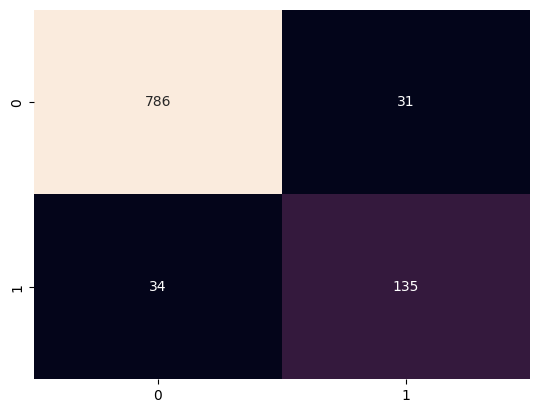

In [ ]:
cm1 = confusion_matrix(y_test, y_pred), sns.heatmap(cm1, annot=True, fmt='.0f', cbar=False)

Di bagian introduksi, kita telah menghitung kalkulasi biaya retensi (mempertahankan pelanggan) yang berkisar sejumlah 21.2 dollar dan biaya untuk mencari pelanggan baru atau acquiring cost sebesar 64 dollar. Lalu kita simulasikan dengan confusion matrix diatas,
- TP, prediksi pelanggan bertahan dan nyatanya bertahan ada 786
- TN, prediksi pelanggan akan churn dan nyatanya mereka pergi ada 135
- FN, prediksi pelanggan tidak akan churn tapi nyatanya mereka meninggalkan platform, atau salah prediksi FN ada 34.
- FP, prediksi pelanggan akan churn tapi nyatanya mereka masih bertahan, atau salah prediksi FP ada 31.
- Total = 986

Skenario 1: Tanpa Machine Learning
- Jika kita tidak melakukan permodelan machine learning maka perusahaan akan mencoba untuk meretensikan semua pelanggan yang ada.
- Artinya 986 akan dikali dengan biaya retensi = 986 x 21.2 = 20.903 dollar, itulah biaya marketingnya.


Skenario 2: Memakai Machine Learning
- Jika kita sudah mengetahui pelanggan mana yang bertahan, maka kita tidak perlu untuk melakukan biaya retensi untuk 786 pelanggan tersebut.
- Namun kita tahu bahwa 135 orang akan churn, jadi kita butuh mencari pelanggan baru sebanyak 135 dengan memakai acquiring cost, 135 X 64 = 8.640 dollar
- Untuk salah prediksi FN disini ada 34 orang pelanggan nyatanya churn, maka perusahaan akan mencari 34 pelanggan baru,  34 x 64 = 2176 dollar
- Untuk salah deteksi FP ada 31 orang dimana 31 orang ini sudah terlanjur dicoba pertahankan dengan menelan biaya retensi. 31 x 21.2 = 657,2 dollar

#### Disini penggunaan machine learning telah menghemat sebanyak (20.903 - 11.293,2) = 9.609,8 dollar penghematan atau 45% dari biaya marketing

Penjelasan diatas telah menjawab problem statement dan bisnis goals dari segi 'permodelan machine learning dan penghematan biaya'

Sedangkan untuk bisnis goals kedua yaitu mencari faktor-faktor yang mempengaruhi churn rate, telah kita lakukan melalui model dan feature importance. 2 faktor utama dalam churn rate adalah:
- Tenure, semakin lama pelanggan berada dalam platform maka semakin ke arah churn.
- Complain, pelanggan yang memiliki komplain cenderung akan melakukan churn.

Dari sini, perusahaan bisa dapat melakukan antisipasi churn dengan melihat 2 faktor tersebut. Dibawah ini adalah rekomendasi yang bisa saya berikan.

# Rekomendasi

Di dalam rekomendasi ini, selain saya akan mencoba menjawab goals ketiga atau mengembangkan strategi untuk mengurangi churn, saya juga akan memberikan rekomendasi dari segi model dan segi data.

### 1. Dari segi bisnis

Ada 2 faktor utama dalam pengaruh ke churn rate pelanggan, yaitu tenure dan complain

1. Tenure
    - Perusahaan bisa memberikan program loyalty berjangka pada pelanggan yang sudah lama di platform. Seperti bonus/diskon jika pelanggan tersebut sudah mencapai setahun berada diplatform dan seterusnya
    - Jika ada pelanggan lama yang terindikasi akan churn, bisa diberikan program pelanggan lama seperti 'veteran program' dengan memberikan mereka reward.

2. Complain
    - Peningkatan kualitas layanan customer service seperti mempermudah penyampaian keluhan dan proaktif, agar pelanggan yang complain merasa puas dengan layanannya.
    - Aktif dalam customer-engagement untuk mendapatkan feedback dari pelanggan. Hal ini agar perusahaan bisa memperbaiki kekurangannya sebelum di beri keluhan oleh pelanggan.
    - Manajemen komplain: selalu melakukan evaluasi terhadap complain dan membuat reporting untuk internal perusahaan terhadap komplain tersebut agar bisa dianalisis lebih sering.

### 2. Dari segi model 

- Diperlukan untuk memonitor model dalam waktu yang rutin. Terlebih jika ada data-data dan fitur yang baru karena kedepannya jika ada update data, bisa jadi model yang yang dipakai akan berbeda karena ada perubahan data di masa mendatang.
- Untuk kedepannya, Bisa memakai metode sampling lainnya diluar ROS dan RUS, seperti jika ada metode sampling terbaru dimasa mendatang yang lebih optimal.
- Bisa dicoba dengan metode trial and error untuk angka-angka dalam hyperparameter tuning.

### 3. Dari segi data

- Untuk kedepannya, mungkin diperlukan penambahan data seperti data demografik untuk memperkuat prediksi model kita.
- Jika kolom-kolom atau fitur didata semakin bertambah bisa lakukan pemilihan fitur dengan metode feature extraction.
- Dataset diatas itu sifatnya imbalance, mungkin kedepannya bisa menambah klasifikasi minoritas untuk mengoptimalkan proses data dan permodelan.

In [ ]:
import pickle

### ==TERIMA KASIH==